In [65]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import *
from plot_main_gpt import *
# basic_plot, plot_main, collect_results, collect_all_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

# sns.set_theme('notebook', 'darkgrid')
# palette = sns.color_palette('colorblind')

run_dir = "../gpt_final"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
3,a601c7c3-37fc-4e31-8809-4542c2be6a46,linear_and_logistic_d=20,Transformer,-1,-1,20,12,8,linear_and_logistic_d=20
4,8a5d962e-6dbb-410a-b9f7-3c0c73989153,linear_classification,Transformer,-1,-1,20,12,8,linear_classification
1,13686ff8-8822-4298-aaa4-4971c5b4b3be,linear_regression,Transformer,-1,-1,20,12,8,linear_regression
0,cf3e1ca2-481b-4a50-9189-8163b11d8b08,nlr_d=20_normalize_mtl,Transformer,-1,-1,20,12,8,nlr_d=20_normalize_mtl
2,bb804a54-db6a-4016-b389-4c4cad28129b,nlr_d=20_normalize_noise=0.1,Transformer,-1,-1,20,12,8,nlr_d=20_normalize_noise=0.1
5,ee7d655f-673a-4d76-96f5-ae776f252d18,nlr_d=20_normalize_noise=0.5,Transformer,-1,-1,20,12,8,nlr_d=20_normalize_noise=0.5


In [105]:
%%capture
metrics = collect_all_results(run_dir, df)

## (Optionally) Re-compute evals of trained models

In [ ]:
# Compute eval of trained model, potentially on more than the training tasks

run_name = "lr_d=20_normalize"
run_id = "34e70efe-a70c-40a0-8ba9-8c0575fbdb7b"

run_path = os.path.join(run_dir, run_name, run_id)
recompute_metrics = True

num_eval_examples = 6400

if recompute_metrics:
    all_task_names = ["linear_regression"]
    get_run_metrics(
        run_path, all_task_names=all_task_names, recompute=True,
        num_eval_examples=num_eval_examples,
    )  # these are normally precomputed at the end of training

In [140]:
%%capture
# Read newest results
metrics = collect_all_results(run_dir, df)

# Make ridge MTL plot

In [ ]:
errs_1, errs_2 = get_ridge_errors()

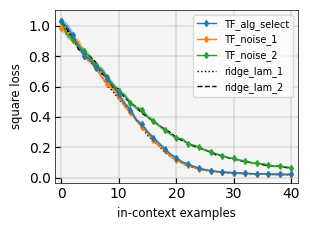

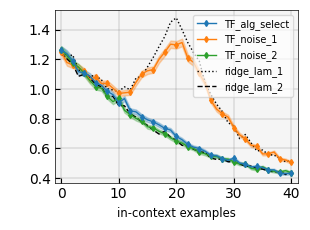

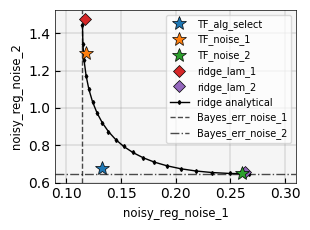

In [244]:
make_ridge_mtl_plot(metrics, errs_1, errs_2)

# Make linear + logistic plot

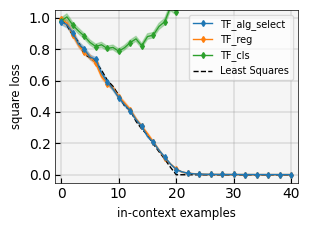

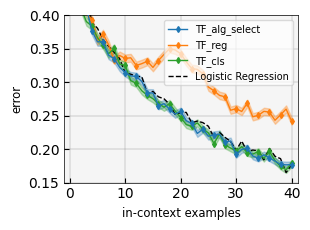

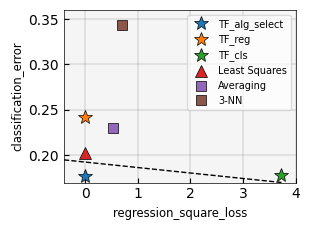

In [245]:
make_linear_logistic_plot(metrics)